In [2]:
#dependencies and set-up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#data files and read results
mouse_path = r"C:\Users\stave\OneDrive\Desktop\Bootcamp\week 5\Challenge\Mouse_metadata.csv"
study_path = r"C:\Users\stave\OneDrive\Desktop\Bootcamp\week 5\Challenge\Study_results.csv"
mouse = pd.read_csv(mouse_path, encoding= 'utf-8')
study = pd.read_csv(study_path, encoding= 'utf-8')
mouse
study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
#merge data files
merge = pd.merge(mouse, study, how="left", on=["Mouse ID", "Mouse ID"])
merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#count number of unique mice id
mice_id = merge["Mouse ID"].nunique()
mice_id

249

In [5]:
#find duplicate mice id
duplicate = merge[merge.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#create dataframe without duplicate mice information
duplicate2 = merge.drop_duplicates(['Mouse ID', 'Timepoint'], keep= False)
duplicate2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#calculate unique mouse count
mice_id2 = duplicate2["Mouse ID"].nunique()
mice_id2

249

In [8]:
#calculate mean of tumor volume based on drug regimen
mean = duplicate2.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#calculate median of tumor volume based on drug regimen
median = duplicate2.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#calculate variance of tumor volume based on drug regimen
variance = duplicate2.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#calculate standard deviation of tumor volume based on drug regimen
standard_deviation = duplicate2.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#calculate standard error of tumor volume based on drug regimen
standard_error = duplicate2.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
standard_error

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#create dataframe for calculations of tumor volume based on drug regimen
summary = pd.DataFrame({
    'Mean Tumor Volume': mean, 
    'Median Tumor Volume': median, 
    'Tumor Volume Variance': variance, 
    'Tumor Volume Std. Dev': standard_deviation, 
    'Tumor Volume Std. Err': standard_error
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#calculate values using aggregate
aggregate = duplicate2.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
aggregate

C:\Users\stave\AppData\Local\Temp\ipykernel_5280\1788089438.py:2: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregate = duplicate2.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


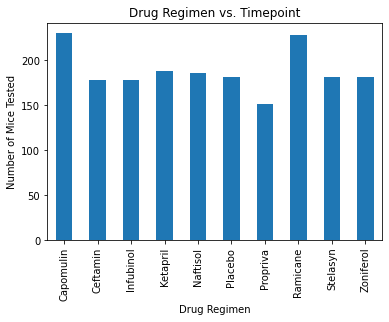

In [15]:
#Create bar chart with pandas for drug regimen vs timepoint
drug_groups = duplicate2.groupby('Drug Regimen')

timepoint = drug_groups['Timepoint'].count()

drug_vs_time = timepoint.plot(kind="bar", title="Drug Regimen vs. Timepoint")
drug_vs_time.set_xlabel("Drug Regimen")
drug_vs_time.set_ylabel("Number of Mice Tested")

plt.show()

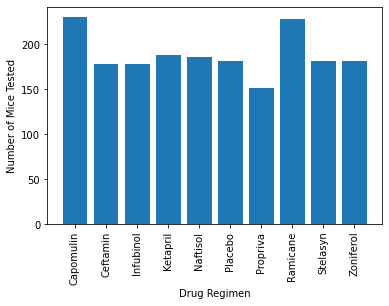

In [16]:
#Create bar chart with pyplot for drug regimen vs timepoint
plt.bar(timepoint.index, timepoint.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:ylabel='Mouse ID'>

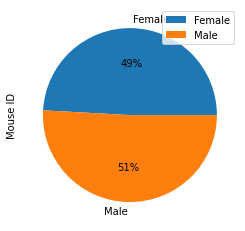

In [17]:
#Create pie chart with pandas for mouse gender
gender = duplicate2.groupby(['Sex']).count()
gender_pie = duplicate2.groupby(['Sex']).count().plot(kind='pie', y = 'Mouse ID', autopct='%1.0f%%')
gender_pie

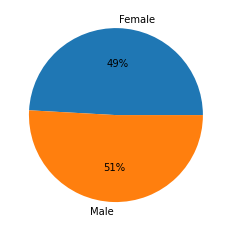

In [18]:
#Create pie chart with pyplot for mouse gender
gender = duplicate2.groupby(['Sex']).count()
plt.pie(gender["Mouse ID"], labels = gender.index, autopct='%1.0f%%')
plt.show()

In [20]:
#calculate last timepoint for each mouse
max_time = duplicate2.groupby(["Mouse ID"])['Timepoint'].max()
max_time = max_time.reset_index()

In [22]:
#merge last timepoint with original dataframe 
merge2 = max_time.merge(duplicate2,on=['Mouse ID','Timepoint'],how="left")
merge2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [50]:
final_volume = merge2.groupby (['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].sum()
final_volume

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Zoniferol     q633        70.827796
              s337        62.109651
              w140        47.717952
              w575        68.401286
              x613        48.077646
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [142]:
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []
for x in treatment:
    tumor_volume.append(final_volume.loc[x])
    #tumor_volume.append(merge2.loc[(merge2['Drug Regimen']==x)])
tumor_volume

[Mouse ID
 b128    38.982878
 b742    38.939633
 f966    30.485985
 g288    37.074024
 g316    40.159220
 i557    47.685963
 i738    37.311846
 j119    38.125164
 j246    38.753265
 l509    41.483008
 l897    38.846876
 m601    28.430964
 m957    33.329098
 r157    46.539206
 r554    32.377357
 r944    41.581521
 s185    23.343598
 s710    40.728578
 t565    34.455298
 u364    31.023923
 v923    40.658124
 w150    39.952347
 w914    36.041047
 x401    28.484033
 y793    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 Mouse ID
 a411    38.407618
 a444    43.047543
 a520    38.810366
 a644    32.978522
 c458    38.342008
 c758    33.397653
 d251    37.311236
 e662    40.659006
 g791    29.128472
 i177    33.562402
 i334    36.374510
 j913    31.560470
 j989    36.134852
 k403    22.050126
 m546    30.564625
 n364    31.095335
 q597    45.220869
 q610    36.561652
 r811    37.225650
 r921    43.419381
 s508    30.276232
 u196    40.667713
 w678    43.166373
 y449    44.183451
 z578 

<function matplotlib.pyplot.show(close=None, block=None)>

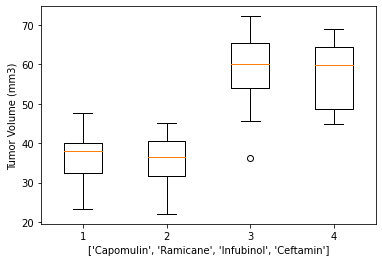

In [100]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel(treatment)
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_volume)
plt.show

In [145]:
capomulin = merge2.loc[merge2["Drug Regimen"] == "Capomulin"]
capomulin

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
81,i557,45,Capomulin,Female,1,24,47.685963,1
84,i738,45,Capomulin,Female,23,20,37.311846,2
86,j119,45,Capomulin,Female,7,23,38.125164,1
88,j246,35,Capomulin,Female,21,21,38.753265,1
109,l509,45,Capomulin,Male,17,21,41.483008,3


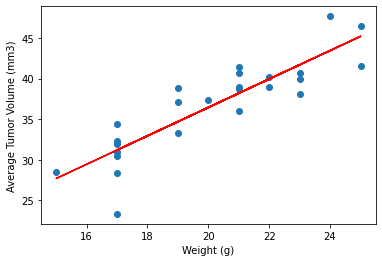

In [151]:
x_axis = capomulin['Weight (g)']
y_axis = capomulin['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.show()

In [153]:
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)

0.88

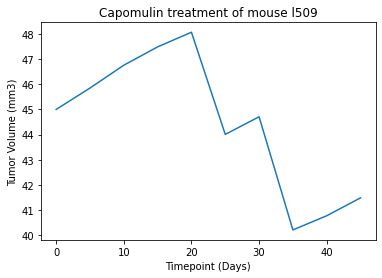

In [143]:
x_axis = duplicate2.loc[duplicate2["Mouse ID"]== "l509","Timepoint"]
y_axis = duplicate2.loc[duplicate2["Mouse ID"]== "l509","Tumor Volume (mm3)"]
#x_axis = i509['Timepoint']
#y_axis = i509['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()
